### Linear Regression | Pipeline | Save and Load a trained Model | Model Evaluation

## Simple Linear Regression


In [17]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [18]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


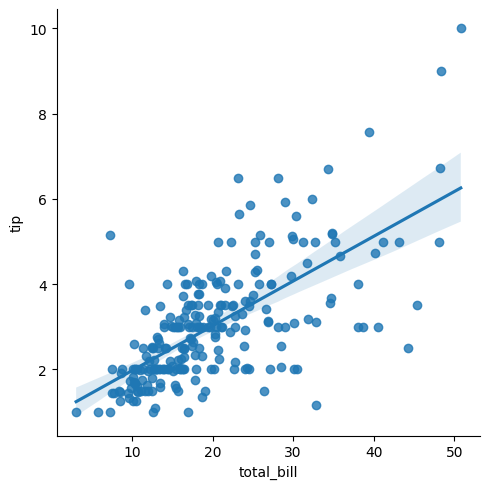

In [19]:
sns.lmplot(x='total_bill',y='tip', data=df)


In [20]:
scaler = StandardScaler()
df[['total_bill','tip']]=scaler.fit_transform(df[['total_bill','tip']])
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,-0.314711,-1.439947,Female,No,Sun,Dinner,2
1,-1.063235,-0.969205,Male,No,Sun,Dinner,3
2,0.137780,0.363356,Male,No,Sun,Dinner,3
3,0.438315,0.225754,Male,No,Sun,Dinner,2
4,0.540745,0.443020,Female,No,Sun,Dinner,4


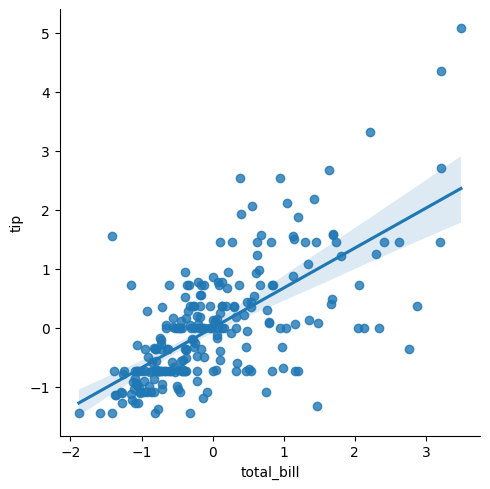

In [21]:
sns.lmplot(x='total_bill',y='tip', data=df)


In [22]:
x = df[['total_bill']]
y = df['tip']

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=42)
le = LinearRegression()
le.fit(x_train,y_train)
le.predict([[123]])


c:\Users\shafi laptop\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([84.68133325])

In [24]:
y_pre = le.predict(x_test)

In [27]:
# evaluation the model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error
print('MSE: ', mean_squared_error(y_test, y_pre))
print('R2: ', r2_score(y_test, y_pre))
print('MAPE: ', mean_absolute_percentage_error(y_test, y_pre))
print('MAE: ', mean_absolute_error(y_test, y_pre))


MSE:  0.2983382530785567
R2:  0.5449381659234667
MAPE:  7.369211703304975
MAE:  0.4496364577054319


In [29]:
import pickle
with open('trained_model.pkl', 'wb') as file:
    pickle.dump(le, file)

print("Model saved successfully!")


Model saved successfully!


# Multilinear Regression


In [34]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

df = sns.load_dataset('tips')
df.head()
x = df[['total_bill', 'size', 'day']]
y = df['tip']
scaler = StandardScaler()
x[['total_bill','size']]=scaler.fit_transform(x[['total_bill','size']])

encode = LabelEncoder()
x['day']=encode.fit_transform(x['day'])
x_test,x_train,y_test,y_train=train_test_split(x,y, test_size=0.2,random_state=42)

model = LinearRegression()
model.fit(x_train,y_train)
y_pre = model.predict(x_test)
print('MSE: ', mean_squared_error(y_test, y_pre))
print('R2: ', r2_score(y_test, y_pre))
print('MAPE: ', mean_absolute_percentage_error(y_test, y_pre))
print('MAE: ', mean_absolute_error(y_test, y_pre))

MSE:  1.258325803496446
R2:  0.38065600609475025
MAPE:  0.27736195905123695
MAE:  0.8101571284055129


# Using Pipleline


In [41]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

df = sns.load_dataset('tips')
X = df[['total_bill', 'size', 'day']]
y = df['tip']

numeric_features = ['total_bill', 'size']
categorical_features = ['day']

processor = ColumnTransformer(transformers=[
    ('scaler', StandardScaler(), numeric_features),
    ('encoder', OneHotEncoder(), categorical_features)
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline(steps=[
    ('preprocessor', processor),
    ('model', LinearRegression())
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print('MSE:', mean_squared_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


MSE: 0.6655725405795047
R2: 0.46752976130485213
MAPE: 0.2730622135259165
MAE: 0.6591957722968487


# Big Data_set

In [46]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

df = sns.load_dataset('diamonds')

X = df.drop('price', axis=1)
y = df['price']

numeric_features = ['carat', 'depth', 'table', 'x', 'y', 'z']
categorical_features = ['cut', 'color', 'clarity']

preprocessor = ColumnTransformer(transformers=[
    ('scaler', StandardScaler(), numeric_features),
    ('encoder', OneHotEncoder(), categorical_features)
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print('MSE:', mean_squared_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


MSE: 1288705.477851676
R2: 0.9189331350419386
MAPE: 0.3952933516494359
MAE: 737.1513665933284


# How to improve the ML model Performance?


In [47]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings('ignore')

df = sns.load_dataset('diamonds')

X = df.drop('price', axis=1)
y = df['price']

numeric_features = ['carat', 'depth', 'table', 'x', 'y', 'z']
categorical_features = ['cut', 'color', 'clarity']

preprocessor = ColumnTransformer(transformers=[
    ('scaler', StandardScaler(), numeric_features),
    ('encoder', OneHotEncoder(), categorical_features)
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', DecisionTreeRegressor())
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print('MSE:', mean_squared_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


MSE: 552341.47752132
R2: 0.9652545963848922
MAPE: 0.08612926806079517
MAE: 360.7345198368558


In [48]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

df = sns.load_dataset('diamonds')

X = df.drop('price', axis=1)
y = df['price']

numeric_features = ['carat', 'depth', 'table', 'x', 'y', 'z']
categorical_features = ['cut', 'color', 'clarity']

preprocessor = ColumnTransformer(transformers=[
    ('scaler', StandardScaler(), numeric_features),
    ('encoder', OneHotEncoder(), categorical_features)
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor())
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print('MSE:', mean_squared_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


MSE: 305802.6236277516
R2: 0.9807632850022656
MAPE: 0.06513179810460339
MAE: 271.9712111083155


In [49]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRFRegressor
import warnings
warnings.filterwarnings('ignore')

df = sns.load_dataset('diamonds')

X = df.drop('price', axis=1)
y = df['price']

numeric_features = ['carat', 'depth', 'table', 'x', 'y', 'z']
categorical_features = ['cut', 'color', 'clarity']

preprocessor = ColumnTransformer(transformers=[
    ('scaler', StandardScaler(), numeric_features),
    ('encoder', OneHotEncoder(), categorical_features)
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', XGBRFRegressor())
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print('MSE:', mean_squared_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


MSE: 1019178.0625
R2: 0.9358879327774048
MAPE: 0.15516112744808197
MAE: 554.6817626953125


In [50]:
import pickle
with open('Train_model.pkl','wb') as file :
    pickle.dump(pipeline,file)